In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [32]:
df_global_original = pd.read_csv('GLB.Ts+dSST.csv', header = 1)
df_north_original = pd.read_csv('NH.Ts+dSST.csv', header = 1)
df_south_original = pd.read_csv('SH.Ts+dSST.csv', header = 1)
df_zone_original = pd.read_csv('ZonAnn.Ts+dSST.csv')

In [33]:
df_global = df_global_original.copy()
df_north = df_north_original.copy()
df_south = df_south_original.copy()
df_zone = df_zone_original.copy()

In [34]:
df_global.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-.10,-.14,-.23,-.22,-.17,-.17,***,***,-0.12,-.16,-.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-.03,-.15,-.22,-.18,-.07,-.09,-.09,-.17,0.05,-.07,-.18
2,1882,0.16,0.14,0.04,-0.17,-0.14,-0.23,-0.16,-.07,-.14,-.24,-.16,-.36,-.11,-.09,.08,-0.09,-.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.07,-0.06,-.14,-.21,-.11,-.23,-.11,-.17,-.19,-.34,-0.15,-.09,-.18
4,1884,-0.13,-0.07,-0.35,-0.40,-0.33,-0.35,-0.30,-.27,-.27,-.25,-.33,-.31,-.28,-.26,-.10,-0.36,-.31,-.28


In [35]:
df_global['Aug'] = pd.to_numeric(df_global['Aug'], errors='coerce')
df_global['Sep'] = pd.to_numeric(df_global['Sep'], errors='coerce')
df_global['Oct'] = pd.to_numeric(df_global['Oct'], errors='coerce')
df_global['Nov'] = pd.to_numeric(df_global['Nov'], errors='coerce')
df_global['Dec'] = pd.to_numeric(df_global['Dec'], errors='coerce')
df_global['J-D'] = pd.to_numeric(df_global['J-D'], errors='coerce')
df_global['D-N'] = pd.to_numeric(df_global['D-N'], errors='coerce')
df_global['DJF'] = pd.to_numeric(df_global['DJF'], errors='coerce')
df_global['JJA'] = pd.to_numeric(df_global['JJA'], errors='coerce')
df_global['SON'] = pd.to_numeric(df_global['SON'], errors='coerce')

In [36]:
df_global.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64

In [37]:
df_global.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
144,2024,1.25,1.44,1.39,1.31,1.14,1.20,1.19,1.3,1.23,1.33,1.29,1.27,1.28,1.29,1.35,1.28,1.23,1.28
145,2025,1.37,1.26,1.36,1.23,1.07,1.04,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30,1.22,NaN,NaN


In [38]:
df_global.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,144.000000,145.000000,146.000000,145.000000,145.000000
mean,1952.500000,0.078630,0.086096,0.104041,0.076918,0.064932,0.053767,0.077397,0.069241,0.073931,0.099310,0.092621,0.066897,0.074207,0.075208,0.078621,0.082329,0.062345,0.088690
std,42.290661,0.446149,0.450946,0.457051,0.419210,0.395613,0.394939,0.378057,0.387031,0.388175,0.394199,0.402211,0.418606,0.392447,0.392059,0.429487,0.419438,0.378680,0.389551
min,1880.000000,-0.810000,-0.640000,-0.640000,-0.600000,-0.560000,-0.520000,-0.510000,-0.550000,-0.580000,-0.580000,-0.570000,-0.820000,-0.490000,-0.490000,-0.680000,-0.590000,-0.500000,-0.520000
25%,1916.250000,-0.247500,-0.237500,-0.227500,-0.250000,-0.240000,-0.240000,-0.190000,-0.220000,-0.190000,-0.210000,-0.180000,-0.210000,-0.200000,-0.220000,-0.230000,-0.257500,-0.220000,-0.180000
50%,1952.500000,-0.010000,-0.035000,0.015000,-0.015000,-0.035000,-0.050000,-0.030000,-0.040000,-0.050000,0.010000,0.020000,-0.040000,-0.030000,-0.050000,-0.020000,-0.015000,-0.040000,-0.010000
75%,1988.750000,0.320000,0.397500,0.345000,0.297500,0.280000,0.267500,0.290000,0.260000,0.250000,0.260000,0.280000,0.320000,0.310000,0.292500,0.370000,0.310000,0.280000,0.280000
max,2025.000000,1.370000,1.440000,1.390000,1.310000,1.140000,1.200000,1.190000,1.300000,1.480000,1.340000,1.410000,1.370000,1.280000,1.290000,1.350000,1.280000,1.230000,1.410000


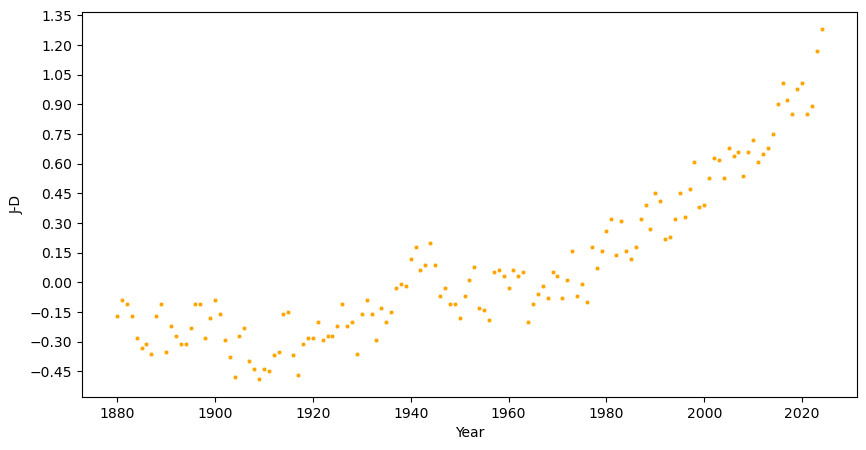

In [39]:
plt.figure(figsize =(10,5))
sns.scatterplot(data=df_global, x='Year', y='J-D', color='orange', s=10) 
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(nbins=15))

In [40]:
df_global.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.22,-0.17,-0.17,NaN,NaN,-0.12,-0.16,-0.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.03,-0.15,-0.22,-0.18,-0.07,-0.09,-0.09,-0.17,0.05,-0.07,-0.18
2,1882,0.16,0.14,0.04,-0.17,-0.14,-0.23,-0.16,-0.07,-0.14,-0.24,-0.16,-0.36,-0.11,-0.09,0.08,-0.09,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.07,-0.06,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-0.19,-0.34,-0.15,-0.09,-0.18
4,1884,-0.13,-0.07,-0.35,-0.40,-0.33,-0.35,-0.30,-0.27,-0.27,-0.25,-0.33,-0.31,-0.28,-0.26,-0.10,-0.36,-0.31,-0.28


In [41]:
df_global['Year'] = pd.to_datetime(df_global['Year'], format='%Y')
#df_global['Year'] = df_global['Year'].dt.year
df_global.set_index('Year', inplace=True)

In [42]:
df_global.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880-01-01,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.22,-0.17,-0.17,NaN,NaN,-0.12,-0.16,-0.20
1881-01-01,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.03,-0.15,-0.22,-0.18,-0.07,-0.09,-0.09,-0.17,0.05,-0.07,-0.18
1882-01-01,0.16,0.14,0.04,-0.17,-0.14,-0.23,-0.16,-0.07,-0.14,-0.24,-0.16,-0.36,-0.11,-0.09,0.08,-0.09,-0.15,-0.18
1883-01-01,-0.29,-0.37,-0.12,-0.18,-0.17,-0.07,-0.06,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-0.19,-0.34,-0.15,-0.09,-0.18
1884-01-01,-0.13,-0.07,-0.35,-0.40,-0.33,-0.35,-0.30,-0.27,-0.27,-0.25,-0.33,-0.31,-0.28,-0.26,-0.10,-0.36,-0.31,-0.28


In [43]:
time_series = df_global['J-D']

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    J-D   No. Observations:                  146
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 120.829
Date:                Fri, 22 Aug 2025   AIC                           -233.659
Time:                        15:20:15   BIC                           -221.752
Sample:                    01-01-1880   HQIC                          -228.821
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0091      0.004      2.556      0.011       0.002       0.016
ar.L1          0.3757      0.167      2.254      0.024       0.049       0.702
ma.L1         -0.7485      0.129     -5.824      0.0

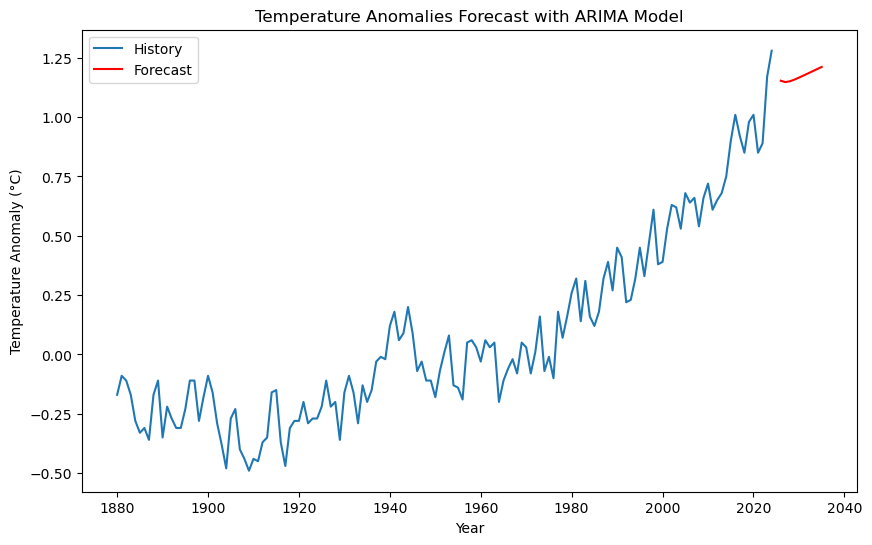

In [44]:
# Statistic model ARIMA for forecasting time series

model = sm.tsa.ARIMA(time_series, order=(1,1,1), trend='t')
results_with_trend = model.fit()

print(results_with_trend.summary())

# Forecasting 10 years ahead
forecast_series = results_with_trend.forecast(steps=10)

plt.figure(figsize=(10, 6))
plt.plot(time_series, label='History')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Temperature Anomalies Forecast with ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

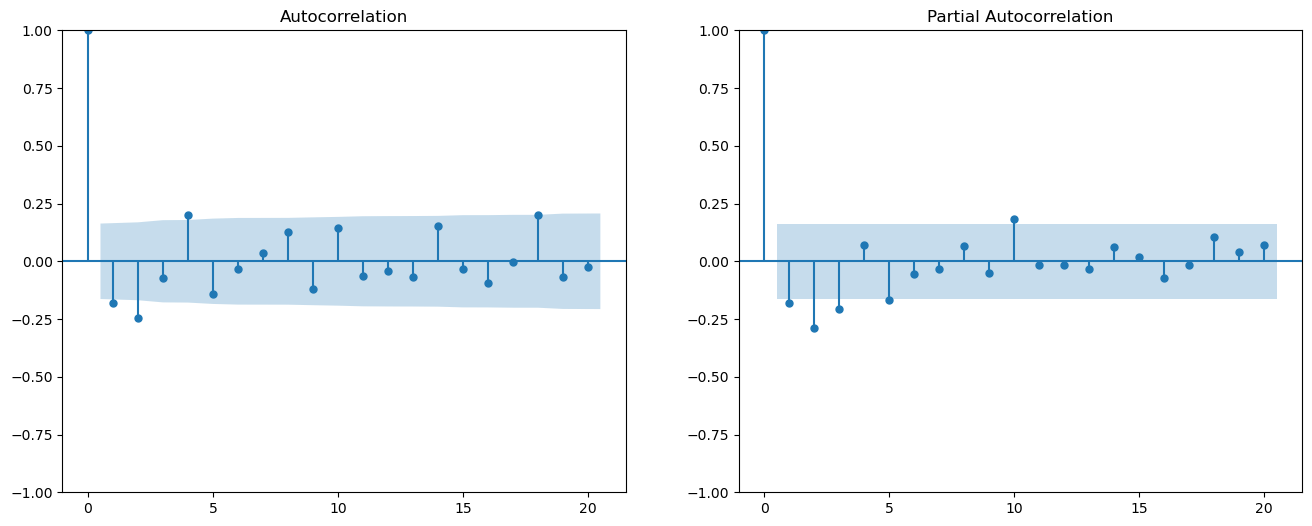

In [45]:
diferenciated_data = time_series.diff().dropna()

# ploting ACF and PACF graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(diferenciated_data, ax=axes[0], lags=20)
plot_pacf(diferenciated_data, ax=axes[1], lags=20, method='ywm')
plt.show()

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JLOUP1A3\AppData\Roami

                               SARIMAX Results                                
Dep. Variable:                    J-D   No. Observations:                  146
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 125.942
Date:                Fri, 22 Aug 2025   AIC                           -237.885
Time:                        15:20:16   BIC                           -217.047
Sample:                    01-01-1880   HQIC                          -229.418
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0090      0.004      2.230      0.026       0.001       0.017
ar.L1         -0.7288      0.190     -3.831      0.000      -1.102      -0.356
ar.L2         -0.1430      0.237     -0.603      0.5

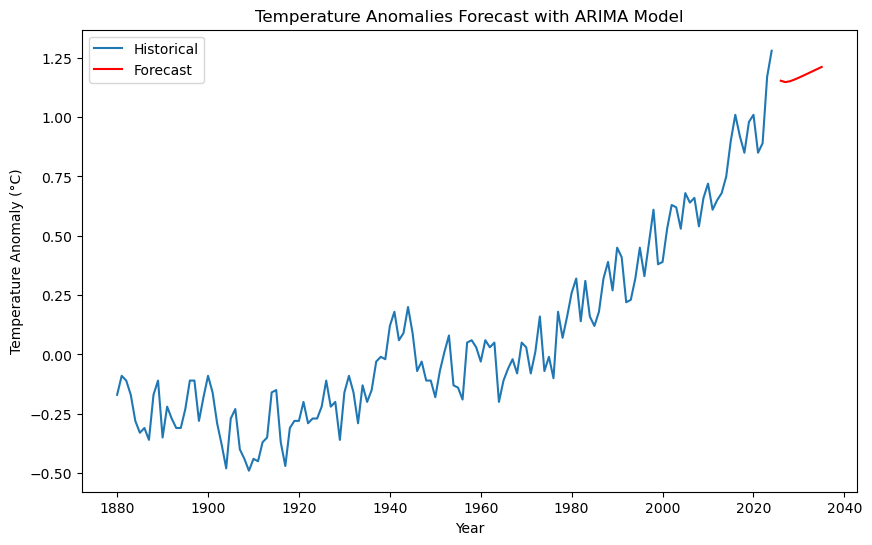

In [46]:
# ARIMA model with the new values for p and q

model_2 = sm.tsa.ARIMA(time_series, order=(3,1,2), trend='t') # (p,d,q)
results_2 = model_2.fit()

print(results_2.summary())

# Forecasting 10 years ahead
forecast_series_2 = results_2.forecast(steps=10)

# Opcional: Plotar o resultado para visualizar a previsão
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Temperature Anomalies Forecast with ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

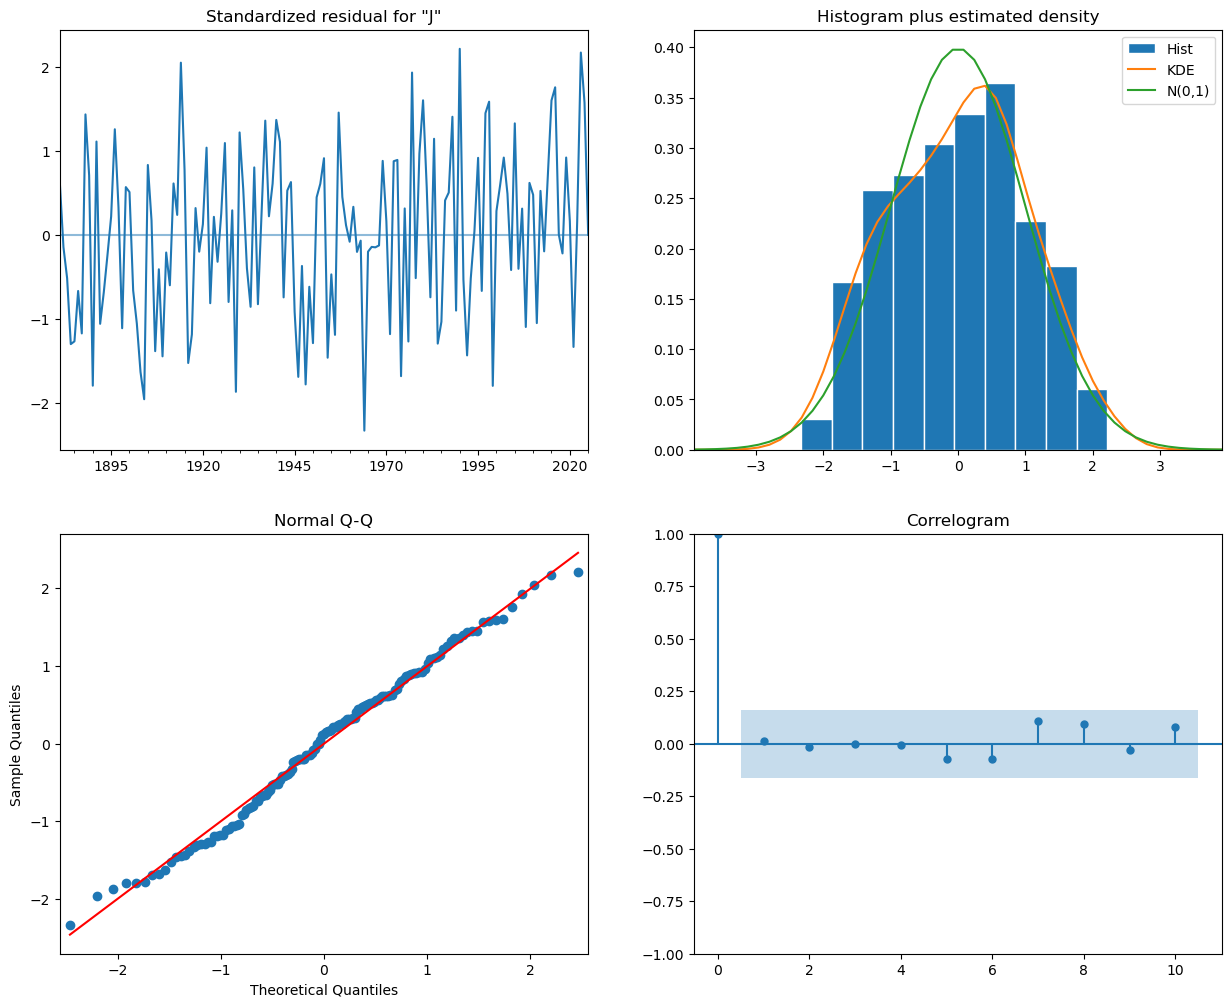

In [47]:
# Ploting the diagnosis of the model
results_2.plot_diagnostics(figsize=(15, 12))
plt.show()

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    J-D   No. Observations:                  146
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 125.038
Date:                Fri, 22 Aug 2025   AIC                           -238.075
Time:                        15:20:18   BIC                           -220.215
Sample:                    01-01-1880   HQIC                          -230.818
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0091      0.005      1.763      0.078      -0.001       0.019
ar.L1         -1.0258      0.137     -7.488      0.000      -1.294      -0.757
ar.L2         -0.5311      0.105     -5.072      0.0

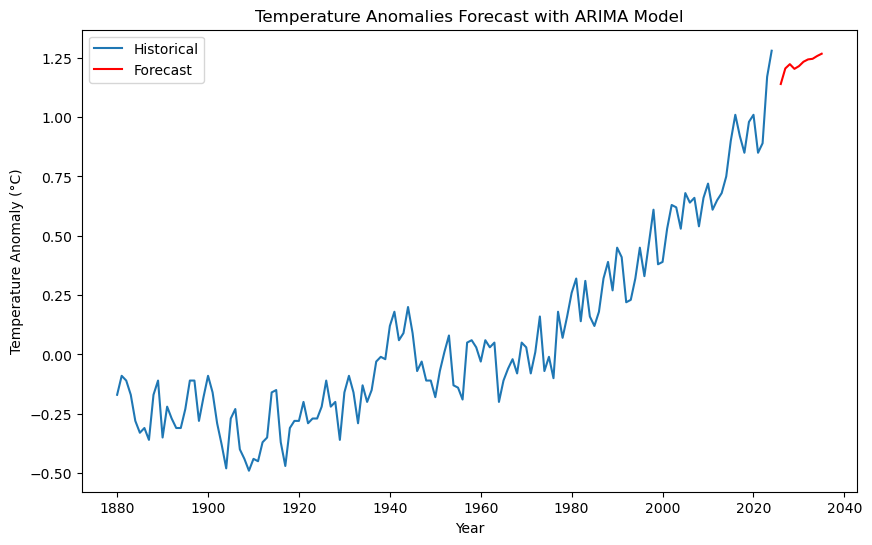

In [48]:
# Adjust ARIMA model
model_4 = sm.tsa.ARIMA(time_series, order=(3,1,1), trend='t')
results_with_trend = model_4.fit()

print(results_with_trend.summary())

# Forecasting 10 years ahead
forecast_series = results_with_trend.forecast(steps=10)

plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Temperature Anomalies Forecast with ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

In [49]:
print('AIC of the model with trend:', results_with_trend.aic)

AIC of the model with trend: -238.0754200721114


In [50]:
model_no_trend = sm.tsa.ARIMA(time_series, order=(3, 1, 1))
results_no_trend = model_no_trend.fit()
print('AIC of the model without trend:', results_no_trend.aic)

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


AIC of the model without trend: -236.9783027290331


In [51]:
print('BIC of the model with trend:', results_with_trend.bic)

BIC of the model with trend: -220.21501761758796


In [52]:
print('BIC of the model without trend:', results_no_trend.bic)

BIC of the model without trend: -222.09463401693023


ARMA model

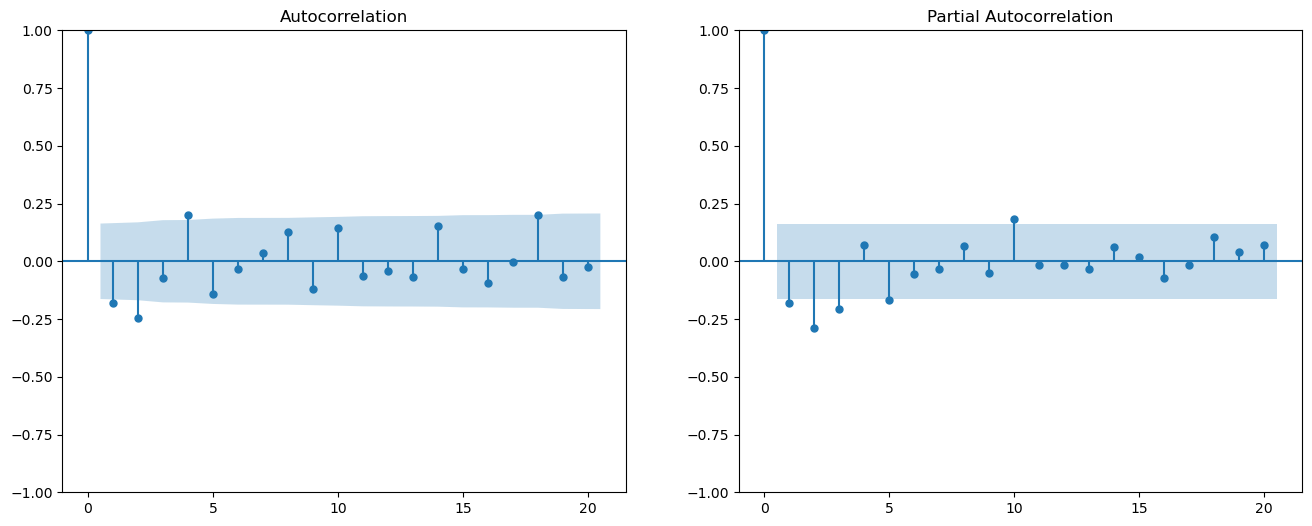

In [53]:
diferenciated_data = time_series.diff().dropna()

# ploting ACF e PACF graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(diferenciated_data, ax=axes[0], lags=20)
plot_pacf(diferenciated_data, ax=axes[1], lags=20, method='ywm')
plt.show()

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JLOUP1A3\AppData\Roami

                               SARIMAX Results                                
Dep. Variable:                    J-D   No. Observations:                  146
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 119.183
Date:                Fri, 22 Aug 2025   AIC                           -224.366
Time:                        15:20:20   BIC                           -203.481
Sample:                    01-01-1880   HQIC                          -215.880
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3358      0.276      1.215      0.224      -0.206       0.878
ar.L1          1.2986      0.377      3.447      0.001       0.560       2.037
ar.L2         -0.6731      0.557     -1.208      0.2

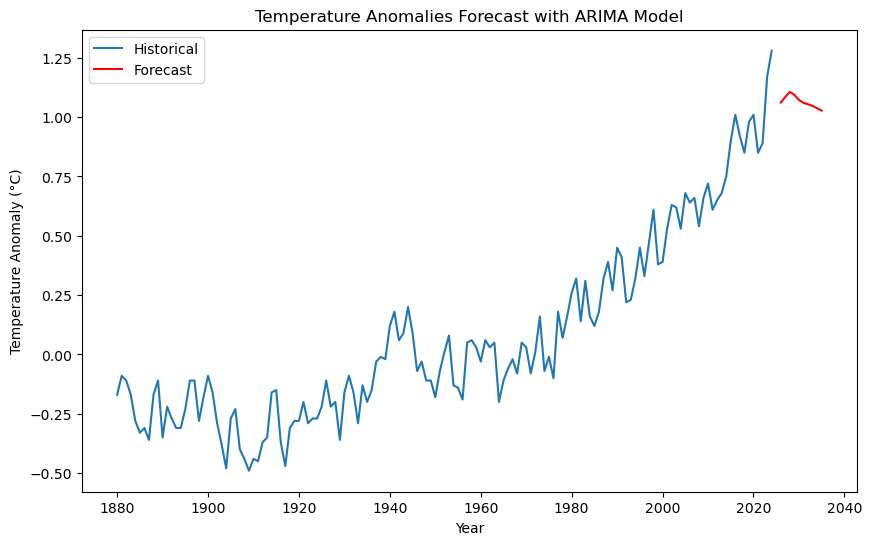

In [54]:
# ARMA statistical model 
model = ARIMA(time_series, order=(3,0,2)) # (p,d,q) colocar d = 0 para modelo ARMA 
results = model.fit()

print(results.summary())

# Forecasting 10 years ahead
forecast_series = results.forecast(steps=10)

plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Temperature Anomalies Forecast with ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    J-D   No. Observations:                  146
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 123.550
Date:                Fri, 22 Aug 2025   AIC                           -237.100
Time:                        15:20:21   BIC                           -222.216
Sample:                    01-01-1880   HQIC                          -231.052
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0090      0.004      2.007      0.045       0.000       0.018
ar.L1         -0.3146      0.085     -3.716      0.000      -0.481      -0.149
ar.L2         -0.3694      0.080     -4.628      0.0

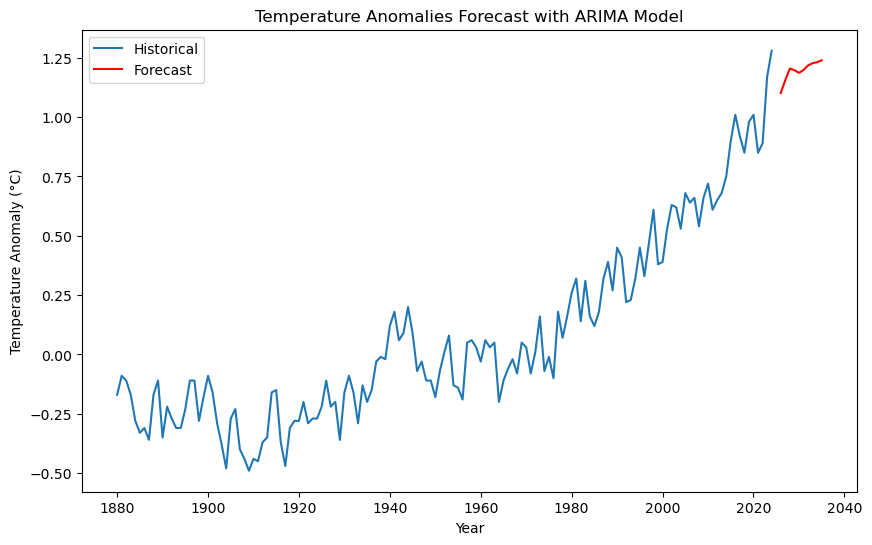

In [55]:
# o quadro acima mostra que apenas o ar.L1 é significativo
model = ARIMA(time_series, order=(3,1,0), trend='t') # (p,d,q) colocar d = 0 para modelo ARMA 
results = model.fit()

print(results.summary())

# Fazer a previsão
# Por exemplo, 10 anos à frente.
forecast_series = results.forecast(steps=10)

# Opcional: Plotar o resultado para visualizar a previsão
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Temperature Anomalies Forecast with ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

SARIMA

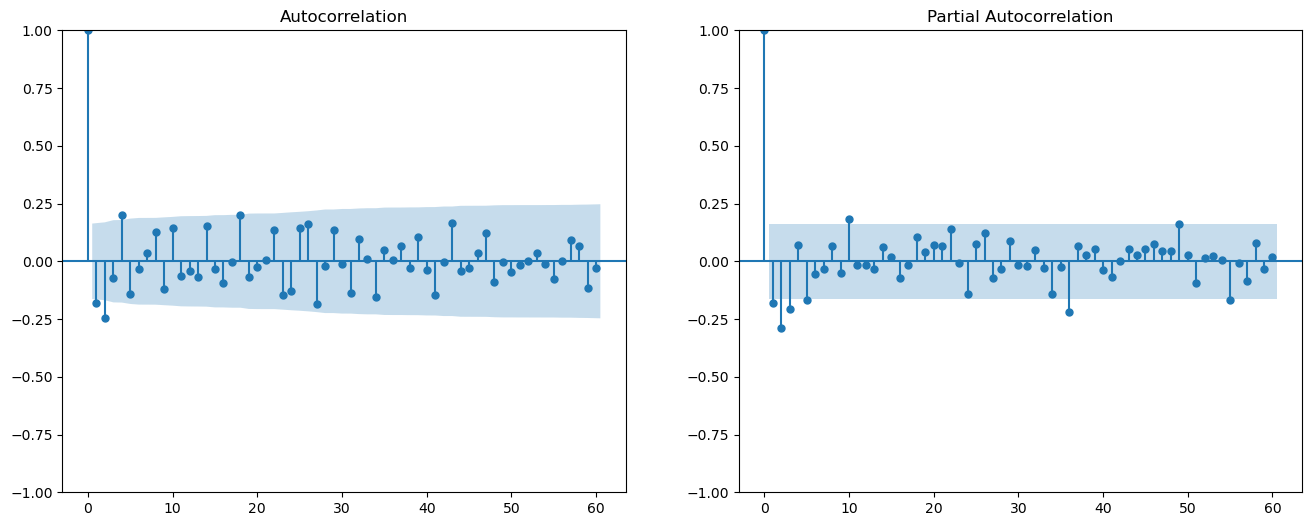

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(diferenciated_data, ax=axes[0], lags=60)
plot_pacf(diferenciated_data, ax=axes[1], lags=60, method='ywm')
plt.show()

In [57]:
model_sarima = sm.tsa.SARIMAX(
    time_series,
    order=(3, 1, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
) # (p,d,q), (P,D,Q,S)

results_sarima = model_sarima.fit()
print(results_sarima.summary())

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                J-D   No. Observations:                  146
Model:             SARIMAX(3, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 111.942
Date:                            Fri, 22 Aug 2025   AIC                           -209.884
Time:                                    15:20:23   BIC                           -189.811
Sample:                                01-01-1880   HQIC                          -201.728
                                     - 01-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8196      0.197     -4.160      0.000      -1.206      -0.433
ar.L2         -0.5269      0.108   

C:\Temp\ipykernel_3860\1895262087.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=time_series.index[-1], periods=30 + 1, freq='Y')[1:]


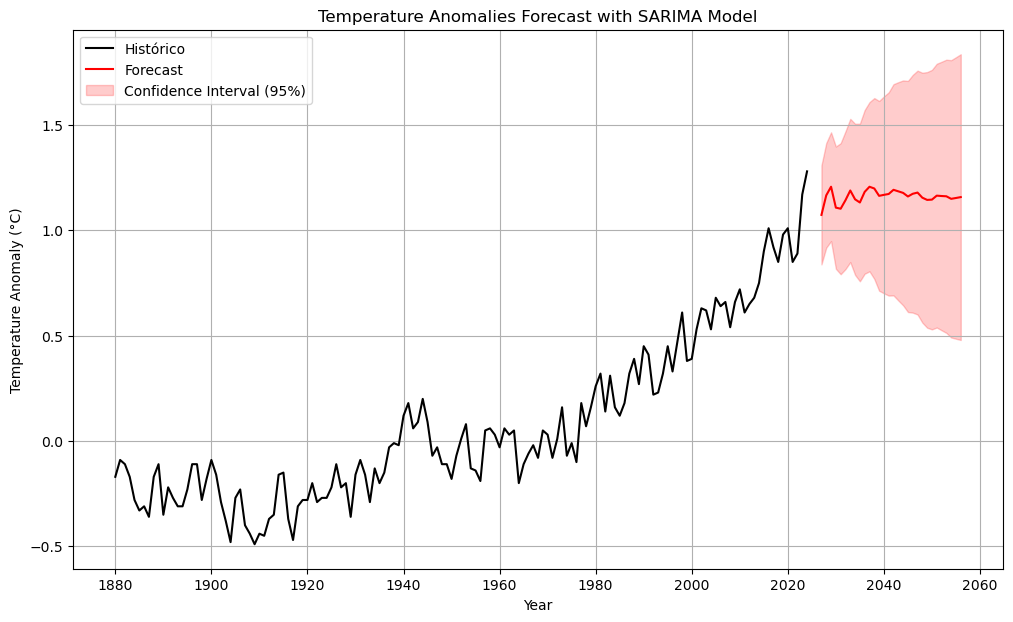

In [58]:
# Forecasting for the next 30 years 
forecast = results_sarima.get_forecast(steps=30)

forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(12, 7))
plt.plot(time_series.index, time_series, label='Histórico', color='black')

# Creates an index for forecasting based on the data of the last historical point
forecast_index = pd.date_range(start=time_series.index[-1], periods=30 + 1, freq='Y')[1:]
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')

# Preencher o espaço entre os limites inferior e superior do intervalo de confiança
plt.fill_between(
    forecast_index,
    confidence_intervals['lower J-D'],
    confidence_intervals['upper J-D'],
    color='red',
    alpha=0.2,
    label='Confidence Interval (95%)'
)

# Adicionar título, rótulos e legenda para melhor visualização
plt.title('Temperature Anomalies Forecast with SARIMA Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

Backtesting

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)



RMSE (Root Mean Squared Error) on the test forecast: 0.4060
MAPE (Mean Absolute Percentage Error) on the test forecast: 0.50%


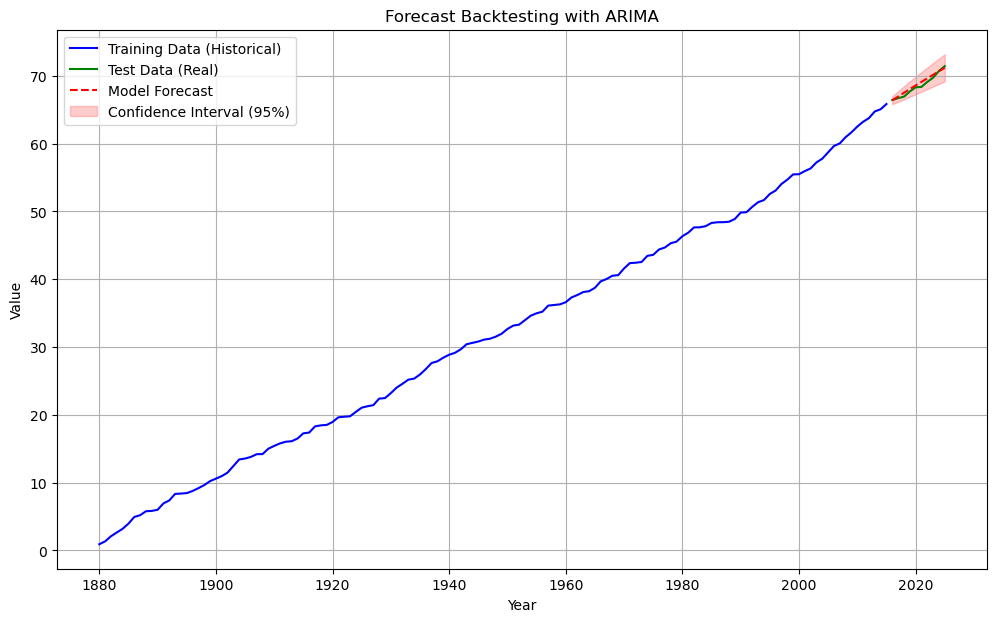

In [ ]:
# Time series from 1880 to 2025 (146 points)
index = pd.to_datetime(range(1880, 2026), format='%Y')
time_series = pd.Series(np.random.rand(len(index)).cumsum(), index=index)

# Train goes until year 2015 (136 first points)
# Test goes from 2016 to 2025 (last 10 points)
train_data = time_series.loc[:'2015']
test_data = time_series.loc['2016':]

# Adjust ARIMA model only to the training data
model = sm.tsa.ARIMA(train_data, order=(3,1,1), trend='t')
model_fit = model.fit()

# Forecasting for the test period
# Number of forecast steps is the size of the test data
forecast_steps = len(test_data)
forecast_object = model_fit.get_forecast(steps=forecast_steps)

# Obtain the forecast series and the confidence intervals
forecast_values = forecast_object.predicted_mean
confidence_intervals = forecast_object.conf_int()

# Evaluate the forecast comparing to the test data
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print(f"\nRMSE (Root Mean Squared Error) on the test forecast: {rmse:.4f}")
# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs(forecast_values - test_data)/np.abs(test_data)) * 100
print(f"MAPE (Mean Absolute Percentage Error) on the test forecast: {mape:.2f}%")

plt.figure(figsize=(12, 7))
plt.plot(train_data, label='Training Data (Historical)', color='blue')
plt.plot(test_data, label='Test Data (Real)', color='green')
plt.plot(forecast_values, label='Model Forecast', color='red', linestyle='--')

plt.fill_between(
    confidence_intervals.index,
    confidence_intervals['lower y'],
    confidence_intervals['upper y'],
    color='red',
    alpha=0.2,
    label='Confidence Interval (95%)'
)

plt.title('Backtesting of Forecasting with ARIMA')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\JLOUP1A3\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)



RMSE (Erro Quadrático Médio da Raiz) na previsão de teste: 0.4170
MAPE (Erro Percentual Absoluto Médio) na previsão de teste: 0.49%


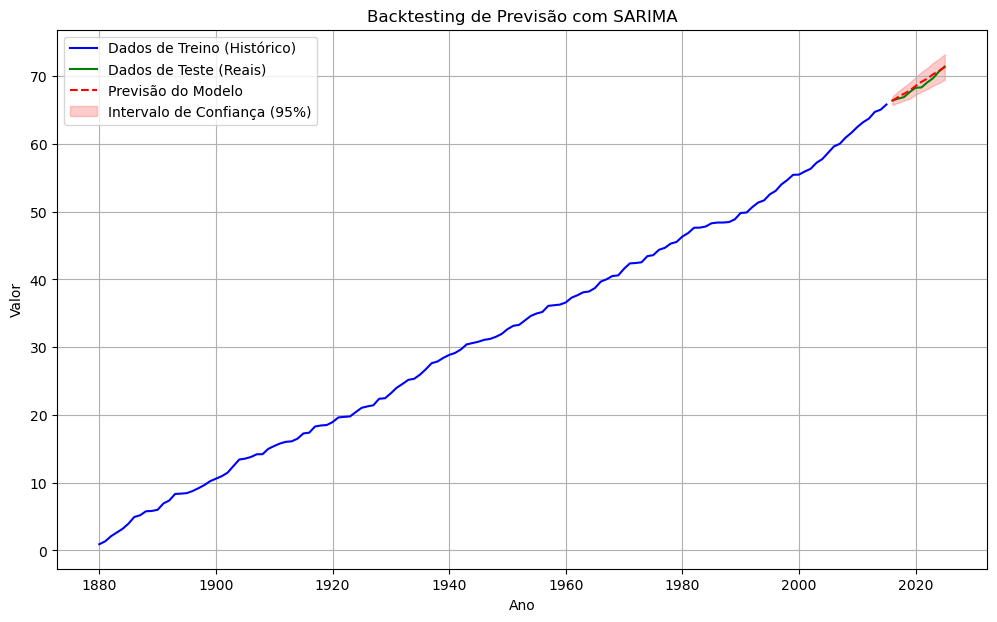

In [ ]:
model_sarima = sm.tsa.SARIMAX(
    train_data,
    order=(3, 1, 1),
    seasonal_order=(1, 0, 2, 10),
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model_sarima.fit()

# Forecasting for the test period
# Number of forecast steps is the size of the test data
forecast_steps = len(test_data)
forecast_object = model_fit.get_forecast(steps=forecast_steps)

# Obtain the forecast series and the confidence intervals
forecast_values = forecast_object.predicted_mean
confidence_intervals = forecast_object.conf_int()

# Evaluate the forecast comparing to the test data
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print(f"\nRMSE (Root Mean Squared Error) on the test forecast: {rmse:.4f}")
# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs(forecast_values - test_data)/np.abs(test_data)) * 100
print(f"MAPE (MEan Absolute Squared Error) on the test forecast: {mape:.2f}%")

plt.figure(figsize=(12, 7))
plt.plot(train_data, label='Training Data (Historical)', color='blue')
plt.plot(test_data, label='Test Data (Reaal)', color='green')
plt.plot(forecast_values, label='Model Forecast', color='red', linestyle='--')

plt.fill_between(
    confidence_intervals.index,
    confidence_intervals['lower y'],
    confidence_intervals['upper y'],
    color='red',
    alpha=0.2,
    label='Confidence Interval (95%)'
)

plt.title('Backtesting of Forecasting with SARIMA')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()